# Part II - (An Exploratory Analysis of Loan Data from Prosper)
## by (Eyong, Wofai Alfred)


## Investigation Overview

> My goal is to identify features of an individual which an investor should consider important when choosing a prosper loan to fund. These features will also help the Prosper Company minimise the occurence of high risk loans which doesnt benefit investors and the Prosper company as a whole.
In summary,  the lender yield as a single metric may not inform an investor about the best prosper loan to invest in. Combining the lender yield with other important metrics will help an investor make better choices on what loan to invest in and help the prosper company fund low risk loans.


## Dataset Overview

> The Prosper loan dataset has 113,937 sample entries in this mother dataset with 81 distinct attributes or characteristics. However, i analysed 14 out of the 81 attributes.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe

loan_clean = pd.read_csv('loan_clean.csv')

In [4]:
#Set colour palette and style
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (12, 8)})
colors = "#5A9"
set_color = sns.set_palette('Set2')
color='teal'

In [5]:
#creating a function to plot histograms
def plot_histogram1(x, title, xlabel, ylabel, lower_limit, bns):
    '''This function plots single histograms'''
   
    #defining bins
    bins = np.arange(lower_limit, loan_clean[x].max()+bns, bns)
    
    #plot the histogram
    plt.hist( data = loan_clean, x = x,  bins = bins, color=colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

In [7]:
#create function to plot scatterplot
def plot_scatter1(x, y, title, xlabel, ylabel, transparency):
    '''This function plots a single scatterplot'''
    
    #regression plot
    sns.regplot(data = loan_clean, x=x, y=y, x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':transparency}, color= colors)
    
    #display graph labels 
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)

## Percentage profit as an investor

The highest possible yield on any loan is 0.492500% on the loaned amount. 0.3% has been most earned by investors, followed closely by 0.15%. On 5 loans, some investors earned -0.010%. This means that as an investor, if the right loans are not selected before investment, one could end up with losses. This business definitely generates more gains than losses for its investors, making it a viable income source.


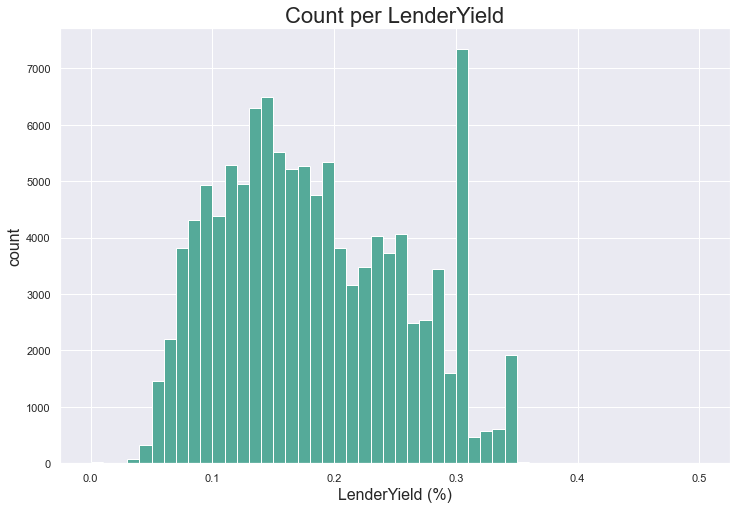

In [6]:
#Histogram showing lender yield percentage distribution
plot_histogram1(x='LenderYield', title = 'Count per LenderYield',xlabel= 'LenderYield (%)', ylabel='count', lower_limit=0, bns=0.01 )


## Relationship between income and loan amount
The higher an individual's income, the higher the loan amount that can be possibly accessed.

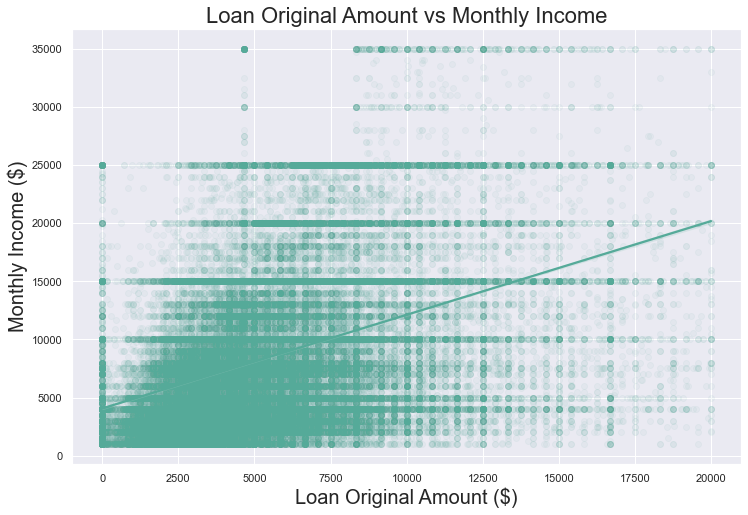

In [9]:
#Scatter plot showing Loan Original Amount against Monthly Income
plot_scatter1(x= 'StatedMonthlyIncome', y= 'LoanOriginalAmount', title= 'Loan Original Amount vs Monthly Income' , xlabel= 'Loan Original Amount ($)', ylabel= 'Monthly Income ($)', transparency=0.05)


## Effect of Loan Amount on Lender Yield

An investor is likely to have a lower percentage yield as the monthly income of the client increases. Although the expected percentage yield drops as loan amount increases, this does not mean the actual amount is smaller. The investor needs to identify the exact rate and loan amount to know what is to be expected by the Lender

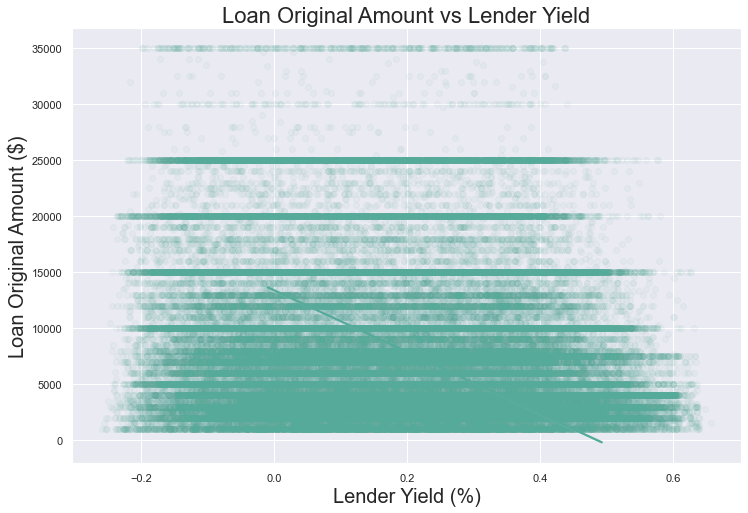

In [11]:
#Scatter plot showing Loan Original Amount against Lender Yield
plot_scatter1(x= 'LenderYield', y= 'LoanOriginalAmount', title= 'Loan Original Amount vs Lender Yield' , xlabel= 'Lender Yield (%)', ylabel= 'Loan Original Amount ($)', transparency=0.05)


## Home ownership status and loan amount
 Home owners are observed to collect significantly higher loan amounts in dollars on average, compared to non home owners, however, getting a high loan amount is still possible, without owning a home.

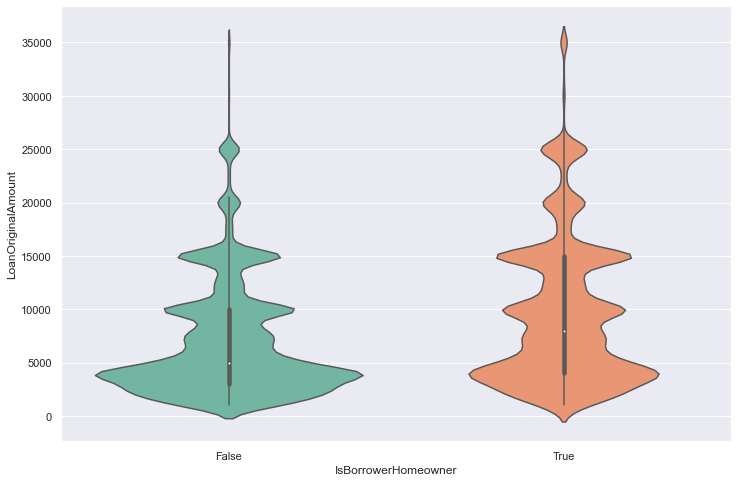

In [14]:
#Violin plot comparing home ownership and loan amount in dollars
sns.violinplot(data = loan_clean, x='IsBorrowerHomeowner', y= 'LoanOriginalAmount');

## Prosper ratings and loan amounts
High risk rated(1.0) individuals were given significantly lower loan amounts compared to higher scored individuals.

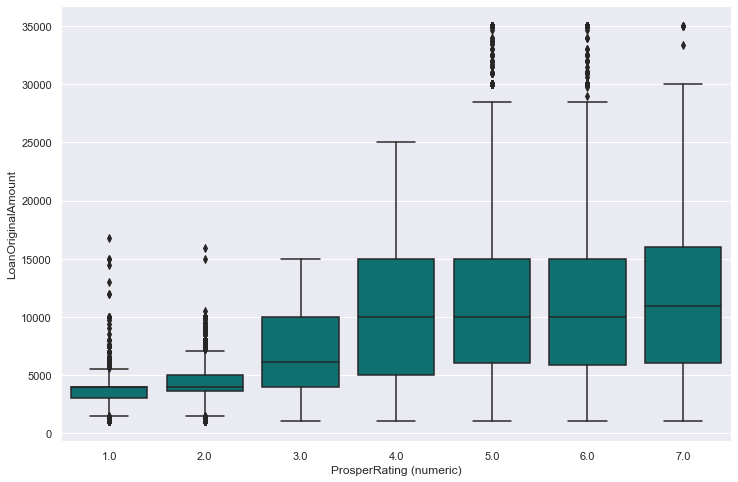

In [16]:
#Boxplot plot comparing Prosper rating and loan amount
sns.boxplot(data = loan_clean, x='ProsperRating (numeric)', y= 'LoanOriginalAmount', color= color);

## Income Range and Loan Term
The 36 month loan duration is prefered by individuals across all income ranges.

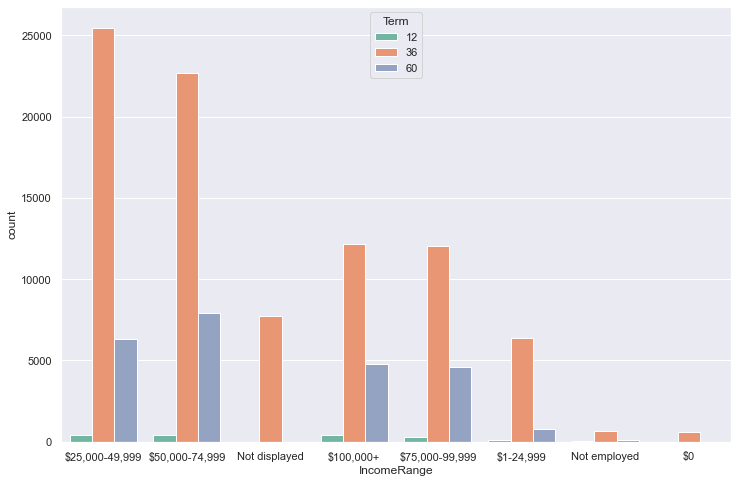

In [17]:
#Clustered barchart showing the distribution of income range over loan term
sns.countplot(data= loan_clean, x= 'IncomeRange', hue='Term');

## Effect of prosper ratings on loan amount and lender yield
The loans of individuals with prosper rating 6 and 7 are the best for loan investment opportunities.

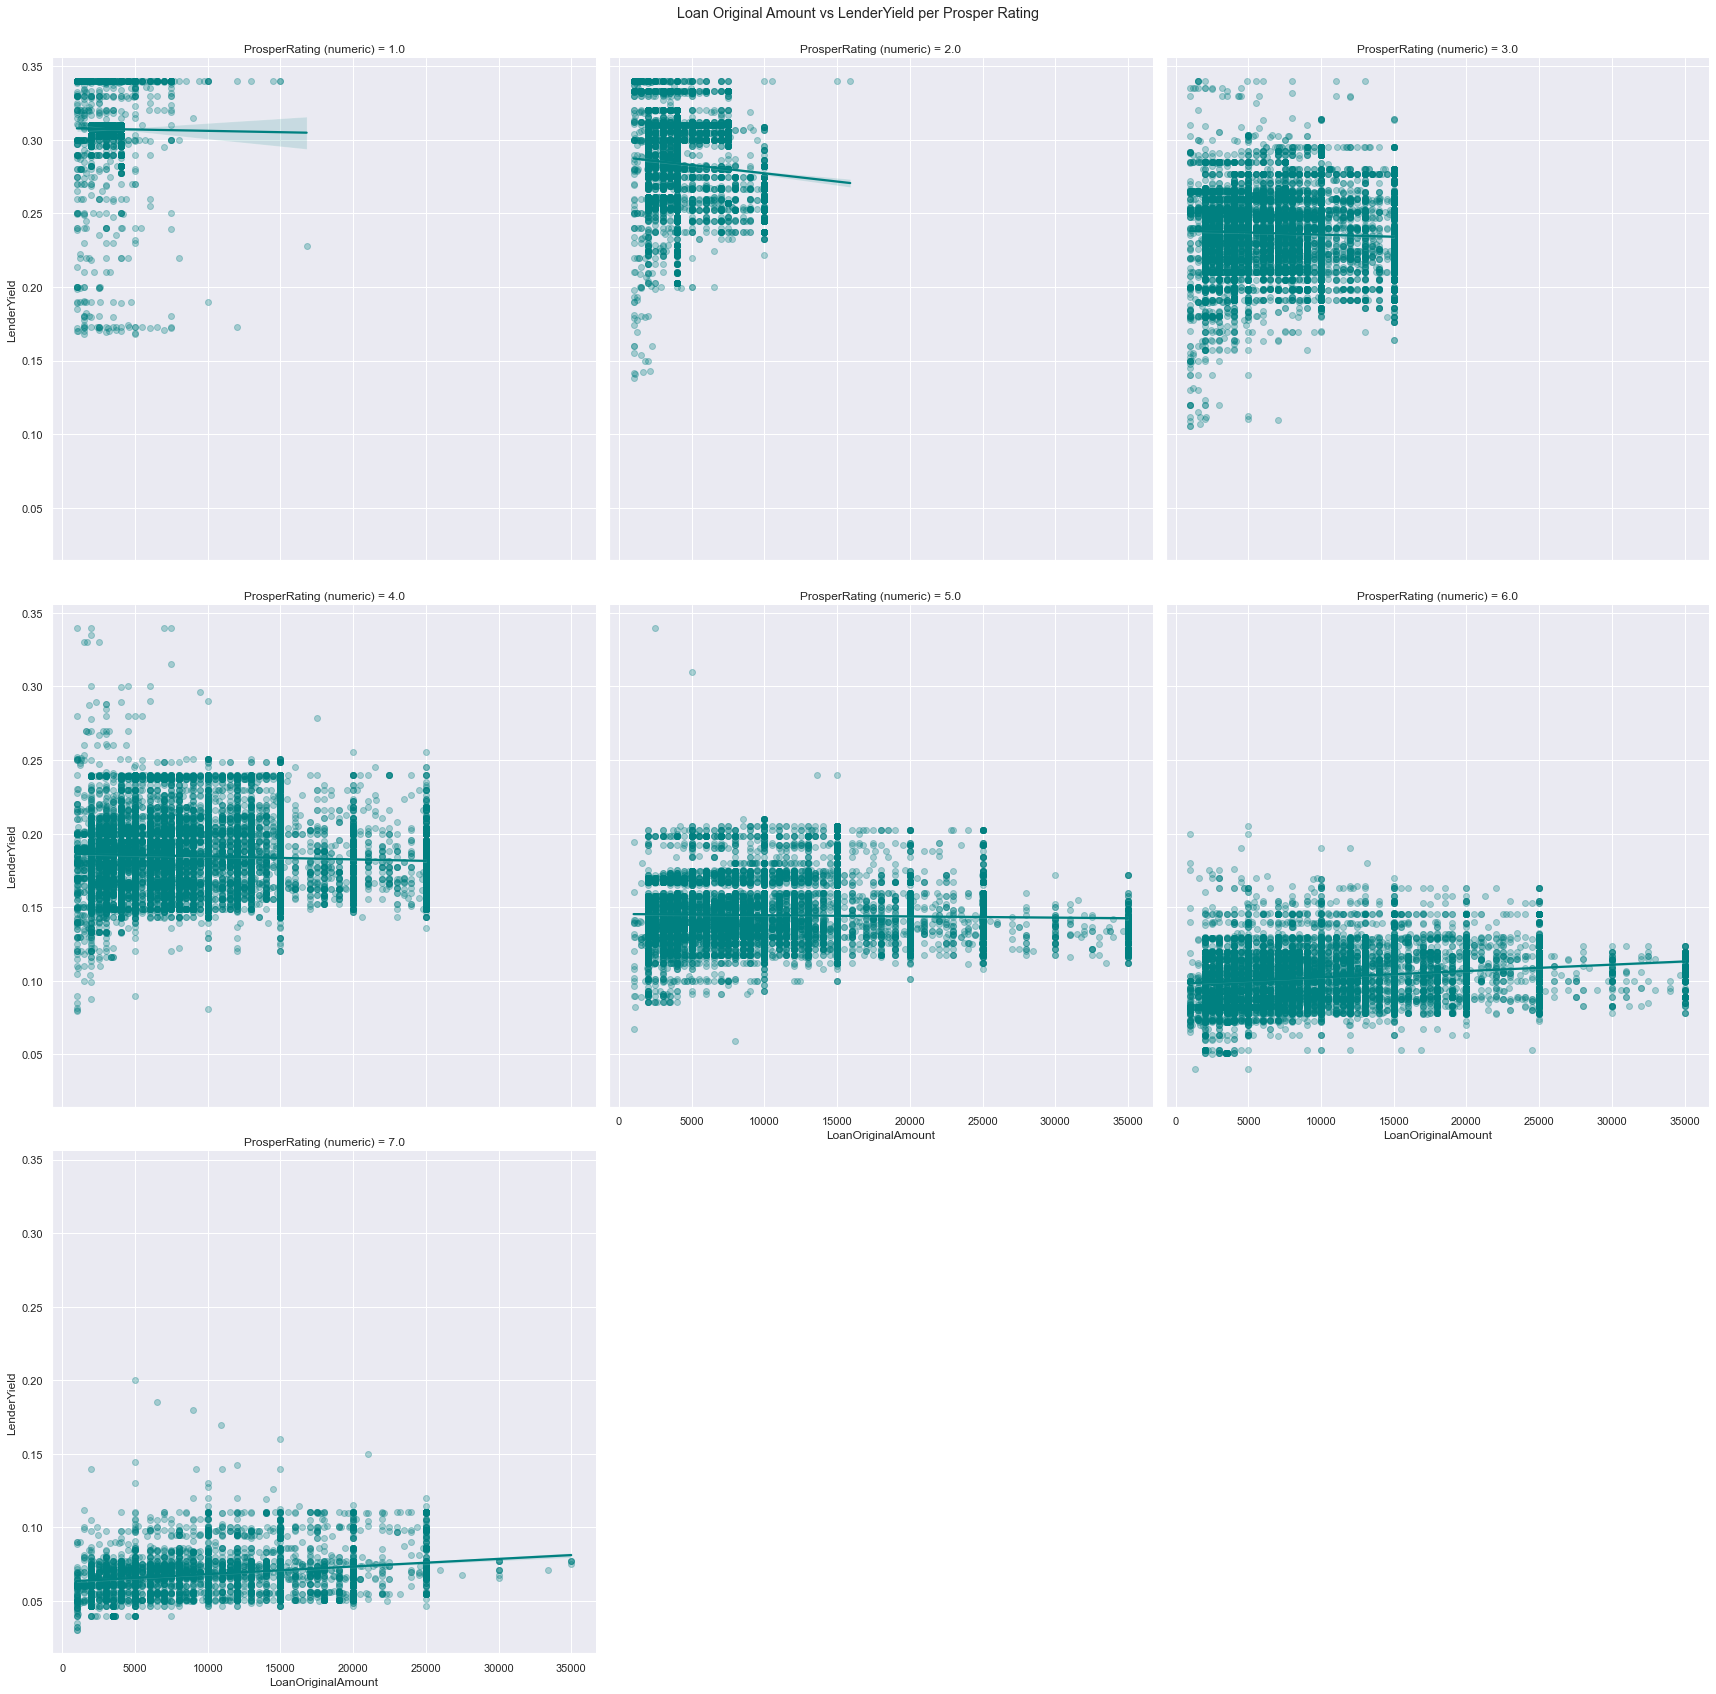

In [18]:
#create a facet grid to accommodate the graph and legend 
g= sns.FacetGrid(data=loan_clean, col='ProsperRating (numeric)', col_wrap=3, height=8)

#plot scatter graph
g.map(sns.regplot, 'LoanOriginalAmount', 'LenderYield', scatter_kws={'alpha': 0.3}, color = color, x_jitter = 0.3)

#display graph labels
plt.suptitle('Loan Original Amount vs LenderYield per Prosper Rating')
plt.subplots_adjust(top=0.95);

## Effect of home ownership and a high credit score on Lender Yield
For both upper and lower credit score, owning a home and having a high credit score range was associated with a better lender yield, compared to individuals who do not own homes and have a lower credit range score.

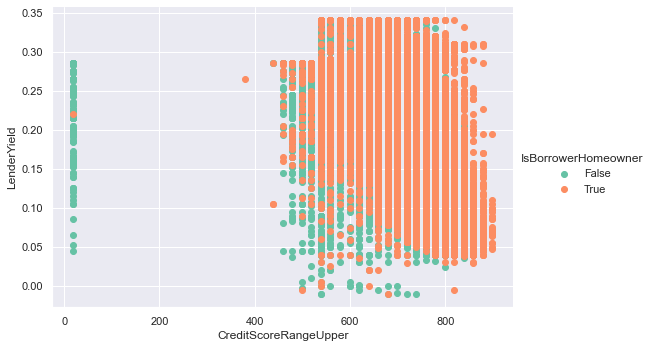

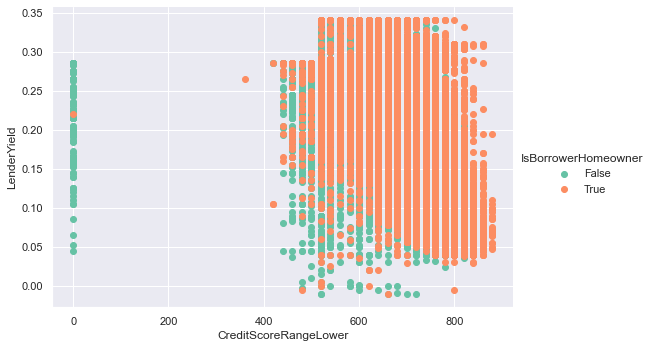

In [20]:
#Scatter plot showing relationships existing between lender yield, home ownership and upper credit score
g = sns.FacetGrid(data = loan_clean, aspect=1.5, height=5, hue='IsBorrowerHomeowner')
g.map(plt.scatter, 'CreditScoreRangeUpper', 'LenderYield'  )
g.add_legend(title='IsBorrowerHomeowner');


#Scatter plot showing relationships existing between lender yield, home ownership and Lower credit score
g = sns.FacetGrid(data = loan_clean, aspect=1.5, height=5, hue='IsBorrowerHomeowner')
g.map(plt.scatter, 'CreditScoreRangeLower', 'LenderYield'  )
g.add_legend(title='IsBorrowerHomeowner')

# Conclusion
After analysis of the prosper loan dataset, it is evident that confirming the lender yield, home ownership status, prosper rating, credit score range and the loan amount is necessary for an investor to choose the best loans to invest in for maximum returns. These features will also help the prosper company reduce its incidences of high risk loans.

In [1]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 2025292 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\fai\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\fai\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\fai\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\fai\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\fai\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)